<h1 style="font-size:30px;">Image Classification using Convolutional Neural Networks</h1>

Image Classification (also called Image Recognition) is the process of labeling or categorizing an image from a set of predefined target classes. Traditionally, in machine learning, image classification solutions involved computing various types of features that were engineered for a particular problem domain. These features were then used as input to train a classifier, such as a Support Vector Machine (SVM) or multinomial Logistics Regression. 

With the advent of Deep Convolutional Neural Networks (CNNs), the process has shifted to a more end-to-end learning process (instead of learning only the classifier). In contrast to traditional machine learning techniques, the features are also learned during the training of the CNNs. Deep CNNs can learn to classify images into thousands of classes. These networks also form the basis for many advanced computer vision problems like Segmentation and Object Detection, as we'll see later in this course. In this notebook, you will learn to perform image classification on a few sample images using a pre-trained deep CNN.

<img src='https://opencv.org/wp-content/uploads/2022/03/c4_03_image_classification.png' width=950 align='center'>

## Table of Contents

* [1 Download the Images](#1-Download-the-Images)
* [2 Read and Display Images](#2-Read-and-Display-Images)
* [3  Load the Model (ResNet50)](#3-Load-the-Model-%28ResNet50%29)
* [4 Perform Inference](#4-Perform-Inference)
* [5 Conclusion](#5-Conclusion)

In [1]:
import tensorflow as tf
import requests
import zipfile
import matplotlib.pyplot as plt
import glob as glob
import os

## 1 Download the Images

We will use three different images for classification in this notebook. Let's download them first.

In [2]:
def download_file(url, save_name):
    url = url
    if not os.path.exists(save_name):
        file = requests.get(url)
        open(save_name, 'wb').write(file.content)

In [3]:
def unzip(zip_file=None):
    try:
        with zipfile.ZipFile(zip_file) as z:
            z.extractall("./")
            print("Extracted all")
    except:
        print("Invalid file")

In [4]:
download_file(
    'https://www.dropbox.com/s/cprmbjb8l3olyiv/dataset_image_classification_cnn.zip?dl=1', 
    'dataset_image_classification_cnn.zip'
)
    
unzip(zip_file='dataset_image_classification_cnn.zip')

Extracted all


## 2 Read and Display Images

In [5]:
# Store all the image paths in a list.
image_paths = glob.glob('dataset_image_classification_cnn/*.jpg')   # glob.glob() returns a list of paths matching a pathname pattern.
print(image_paths)

['dataset_image_classification_cnn\\car.jpg', 'dataset_image_classification_cnn\\dog.jpg', 'dataset_image_classification_cnn\\tiger.jpg']


### 2.1 Display the Sample Test Images

Before moving on to actual classification, let's display the three test images that we will perform infernce on.

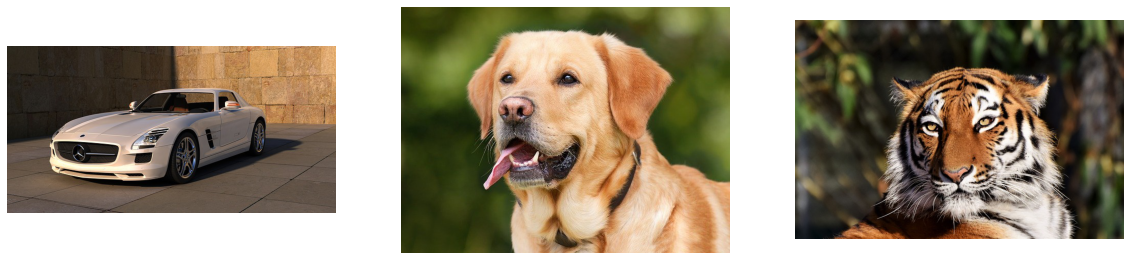

In [ ]:
plt.figure(figsize=(20, 8))
for idx, image_path in enumerate(image_paths):
    image = plt.imread(image_path)
    plt.subplot(1, 3, idx+1)
    plt.imshow(image)
    plt.axis('off')
plt.show()

## 3 Load the Model (ResNet50)

For this example, we will use the **ResNet50** model available in `tf.keras.applications`. This model has been pre-trained on the <a href="https://www.image-net.org/index.php" target="_blank">ImageNet</a> 1K dataset, which contains more than 1.2 million training images distributed across 1,000 classes. Such pre-trained models can be used out-of-the-box for many types of classification problems as long as the images we intend to classify are represented in the ImageNet dataset. For reference, here is the list of class labels for ImageNet <a href="https://image-net.org/challenges/LSVRC/2012/browse-synsets" target="_blank">ImageNet Class Labels.</a> 

If your problem domain is very specific and contains images that do not have representations in ImageNet (for example, circuit boards, dental x-rays, hand sign language, biological images, etc...), then using a pre-trained model based on ImageNet out-of-the-box will not produce good results. However, as we will learn in a future video, you can use **transfer learning** to leverage pre-trained models for use in specific problem domains, which can be highly effective and is a very common approach that can still leverage the use of large, pre-trained models.

The Keras API provides the following utility to instantiate a ResNet50 model. For more information on the ResNet50 API in Keras refer to the documentation page: <a href="https://www.tensorflow.org/api_docs/python/tf/keras/applications/resnet50/ResNet50" target="_blank">ResNet50</a>
```python
tf.keras.applications.resnet50.ResNet50(include_top=True, 
                                        weights='imagenet', 
                                        input_tensor=None,
                                        input_shape=None, 
                                        pooling=None, 
                                        classes=1000,
                                        classifier_activation='softmax',
                                       )
```

In this notebook, we will initialize the weights from the ImageNet dataset by setting `weights='imagenet'` as shown in the code cell below.

In [6]:
# Load the pre-trained ResNet50 model.
model = tf.keras.applications.resnet50.ResNet50(weights='imagenet')

102967424/102967424 [==============================] - 9s 0us/step


In [7]:
model.output_shape 

(None, 1000)

Since the model was trained on imagenet dataset, that has 1000 classes, therefore the model has an output shape of 1000.

## 4 Perform Inference

Since we are using the Keras API, it is straightforward to make predictions using a pre-trained model. In the code below, we will perform the following steps. These steps are generally required to perform inference on the sample images:
1. Read the image & decode it into a tensor.
2. Perform the required pre-processing as required by the model. For example - resizing the images to a standard size of `224 x 224`.
3. Create a data batch from the images. This is needed because the predict method works on image batches. Even if we are using a single image, we need to create a batch of 1 image.
4. Call the `preprocess_input()` method to normalize the image so that it contains pixels in the range of -1 to 1, which matches the format of the images used to train the original ResNet50 model.
4. Call the `predict()` method - returns the probabilities for the 1000 classes for each image in the batch.
5. Decode the predictions to find the class name and confidence score of predictions, using a convenient utility function `decode_predictions()`.

35363/35363 [==============================] - 0s 1us/step


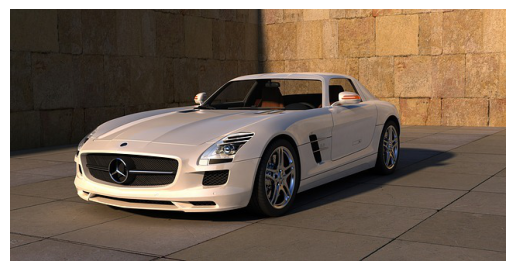

Prediction 0: sports_car, 49.18%
Prediction 1: racer, 24.73%
Prediction 2: car_wheel, 10.71%
Prediction 3: convertible, 5.65%
Prediction 4: cab, 2.90%
1/1 [==============================] - 0s 108ms/step


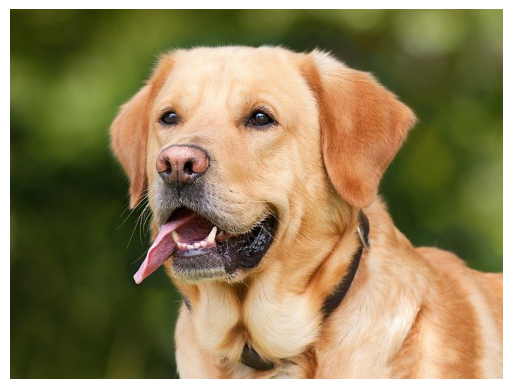

Prediction 0: Labrador_retriever, 70.46%
Prediction 1: golden_retriever, 26.02%
Prediction 2: Rhodesian_ridgeback, 1.71%
Prediction 3: Chesapeake_Bay_retriever, 0.27%
Prediction 4: Tibetan_mastiff, 0.14%
1/1 [==============================] - 0s 94ms/step


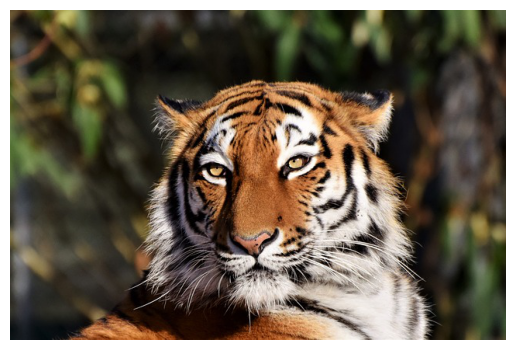

Prediction 0: tiger, 61.33%
Prediction 1: tiger_cat, 37.18%
Prediction 2: jaguar, 0.70%
Prediction 3: lynx, 0.23%
Prediction 4: leopard, 0.07%


In [8]:
for _, image_path in enumerate(image_paths):
    
    # Read image using TensorFlow.
    tf_image = tf.io.read_file(image_path)
    
    # Decode the above `tf_image` from a Bytes string to a Tensor.
    decoded_image = tf.image.decode_image(tf_image)
    
    # Resize the image.
    image_resized = tf.image.resize(decoded_image, (224, 224))
    
    # Add batch dimension at the beginning - (batch_size, height, width, channels).
    image_batch = tf.expand_dims(image_resized, axis=0)
    
    # Preprocess the batched image to bring it to appropriate scale.
    image_batch = tf.keras.applications.imagenet_utils.preprocess_input(image_batch)
    
    # Forward pass through the model.
    predictions = model.predict(image_batch)
    
    # Decode the predictions from class number to actual class names.
    processed_preds = tf.keras.applications.imagenet_utils.decode_predictions(
        preds=predictions,
        top=5
    )
    
    # Display the image and print the top 5 predictions for each.
    plt_image = plt.imread(image_path)
    plt.imshow(plt_image)
    plt.axis('off')
    plt.show()
    for num, pred in enumerate(processed_preds[0]):
        print(f"Prediction {num}: {pred[1]}, {pred[2]*100:.2f}%")

For every image, we are printing the top-5 predictions based on the probability scores from the network. For the image of the dog, although the top prediction is `Labrador_retriever`, the second prediction, which is, `golden_retriever` is indistinguishable by most people. The ImageNet dataset has a lot of granularity and therefore contains distinct classes for many object types that are very similar. For example, there are 15 different types of snakes in the dataset.

## 5 Conclusion

In this notebook, we learned how to perform image classification using a pre-trained ResNet50 model. In subsequent notebooks, you will learn more about the pre-trained models that TensorFlow provides and how to create a simple pipeline where you can perform inference using any of those pre-trained models.

As a simple exercise, try using some of your own images or download images from the internet and modify the initial portion of this notebook to classify them. You will be amazed by the model's performance!